https://www.youtube.com/watch?v=uM4u7P2xkO8

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
import pathlib
print(tf.__version__)

2.16.0-rc0


Descargar imágenes de manos (piedra, papel, tijera):

In [3]:
url_datos = "https://github.com/CodigoMaquina/code/raw/main/datos/piedra_papel_tijera.zip"
archivo = tf.keras.utils.get_file(origin=url_datos, extract=True)
ruta = str(pathlib.Path(archivo)).replace(".zip", "")
print("Ruta donde están almacenadas las imágenes", ruta)

Ruta donde están almacenadas las imágenes C:\Users\Nuria Gurillo\.keras\datasets\piedra_papel_tijera


Poner imágenes en arrays con su identificador

In [5]:
# Descripción de clases y su identificador
descripcion = ("papel", "piedra", "tijera")
clases = {"papel" : 0, "piedra" : 1, "tijera" : 2}

# Número de imágenes de cada clase
num_img_clase = 700

# Imágenes de Entrenamiento de cada clase: 490
# 70% de las imágenes de una clase = 490 imágenes
num_entrena = round(num_img_clase * 0.70)

# Imágenes de Prueba de cada clase: 210
# 30% de las imágenes de una clase = 210 imágenes
num_prueba = round(num_img_clase * 0.30)

# Creación de arreglos para almacenar datos de Entrenamiento para las 3 clases
# Las imágenes son de 30 (ancho) x 20 (alto)
imagenes_entrena = np.empty((num_entrena * len(clases), 20, 30), dtype="uint8")
clases_entrena = np.empty(num_entrena * len(clases), dtype="uint8")

# Creación de arreglos para almacenar datos de Prueba para las 3 clases
imagenes_prueba = np.empty((num_prueba * len(clases), 20, 30), dtype="uint8")
clases_prueba = np.empty(num_prueba * len(clases), dtype="uint8")

# Cargar datos de Entrenamiento: imágenes de la 0 a la 489
for i in range(num_entrena):
  for clase in clases:
    imagen = Image.open(ruta + "/" + clase + "/" + str(i) + ".png")
    indice_instancia = i + clases[clase] * num_entrena
    imagenes_entrena[indice_instancia] = np.array(imagen)
    clases_entrena[indice_instancia] = clases[clase]

# Cargar datos de Prueba: imágenes de la 490 a la 699
for i in range(num_entrena, num_img_clase):
  for clase in clases:
    imagen = Image.open(ruta + "/" + clase + "/" + str(i) + ".png")
    indice_instancia = i + clases[clase] * num_prueba - num_entrena
    imagenes_prueba[indice_instancia] = np.array(imagen)
    clases_prueba[indice_instancia] = clases[clase]

In [ ]:
#ruta_archivo = "C:\\wrk\\IA\\courses\\neural-networks-deep-learning\\classificate_files\\dataset_files\\papel\\1.txt"
#with open(ruta_archivo) as f:
    #print(f)

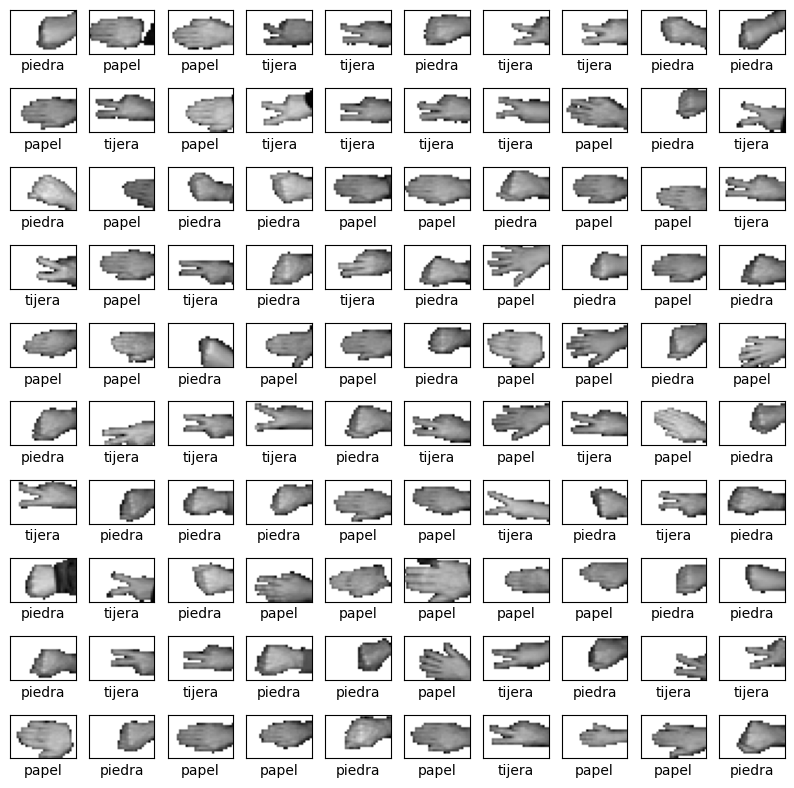

In [7]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    # Selección aleatoria de una imagen
    indice = random.randint(0, num_entrena*len(clases) - 1)
    plt.imshow(imagenes_entrena[indice], cmap="gray")
    plt.xlabel(descripcion[clases_entrena[indice]])
    plt.xticks([])
    plt.yticks([])
plt.show()

Escalar imagenes de [0,255] a [0,1]

In [9]:
imagenes_entrena = imagenes_entrena / 255
imagenes_prueba = imagenes_prueba / 255

Crear el la estructura del modelo

In [11]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(20, 30)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Softmax()
])

C:\Users\Nuria Gurillo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilar modelo

In [13]:
modelo.compile(optimizer="sgd",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

Entrenar modelo

In [15]:
modelo.fit(imagenes_entrena, clases_entrena, epochs=50)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3611 - loss: 1.1506
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4828 - loss: 1.0178
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5608 - loss: 0.9544
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5859 - loss: 0.9085
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6249 - loss: 0.8483
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6989 - loss: 0.7854
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6866 - loss: 0.7663
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6896 - loss: 0.7541
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7218 - loss: 0.7144
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7421 - loss: 0.6714
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7361 - loss: 0.6418
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7527 - lo

Predecir imágenes de prueba

In [ ]:
predicciones = modelo.predict(imagenes_prueba)

In [ ]:
for instancia in range(num_prueba * len(clases)):
    print(predicciones[instancia])

In [ ]:
# Creación de arreglo para almacenar predicciones
clase_predicha = np.empty(num_prueba * len(clases), dtype = "uint8")

for instancia in range(num_prueba * len(clases)):
  # almacena clase predicha para una imagen dada
  clase_predicha[instancia] = np.argmax(predicciones[instancia])
  #if clase_predicha[instancia] == clases_prueba[instancia]:
    #print("Probabilidades:", predicciones[instancia],
          #"Clase predicha:", clase_predicha[instancia],
          #"Clase correcta:", clases_prueba[instancia],
          #"La Red Neuronal ACERTÓ")
  #else:
    #print("Probabilidades:", predicciones[instancia],
          #"Clase predicha:", clase_predicha[instancia],
          #"Clase correcta:", clases_prueba[instancia],
          #"La Red Neuronal ERRÓ")

In [ ]:
matriz = tf.math.confusion_matrix(clases_prueba, clase_predicha)
print("Matriz de Confusión:\n", matriz.numpy())